# Tarefa-01. MO432.

## Patrick de Carvalho Tavares Rezende Ferreira - 175480

In [19]:
from matplotlib import pyplot as plt
from numpy import hstack, add
from pandas import read_csv, get_dummies
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, make_scorer
from sklearn.model_selection import ShuffleSplit, cross_validate
from sklearn.preprocessing import StandardScaler

### Item 1 - Input de dados CSV

Primeiramente, lemos o arquivo CSV com os dados categóricos e não categóricos a serem trabalhados.

In [20]:
data = read_csv("car-data.csv")

### Item 2 - Dados categóricos para "dummy variables"

Abaixo fazemos a impressão de alguns dos atributos originais do arquivo CSV e dos atributos após a conversão de atributos categóricos em "dummy variables", utilizando o One Hot Encoding. O tamanho original também é exibido abaixo de cada impressão, sendo de 301 amostras e 9 features para o arquivo original, e 301 amostras com 110 features após a conversão das variáveis categóricas em "dummy variables".

In [21]:
print(data)
print("\n\n==============================================\n\n")
print(get_dummies(data))
get_dummies(data).to_csv("car-with-dummies.csv")

# OneHot encoding para converter vriaveis ctegoricas em dummy variables.
data = get_dummies(data)

# Separamos dados de entrada dos dados de saida.
# A coluna a remover ("i") eh a do selling_price.
i = 1
X_data = hstack((data.to_numpy()[:, 0:i], data.to_numpy()[:, i + 1:]))
# X_data = X_data.T
y_data = data.to_numpy()[:, i]

    Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0       ritz  2014           3.35           5.59       27000    Petrol   
1        sx4  2013           4.75           9.54       43000    Diesel   
2       ciaz  2017           7.25           9.85        6900    Petrol   
3    wagon r  2011           2.85           4.15        5200    Petrol   
4      swift  2014           4.60           6.87       42450    Diesel   
..       ...   ...            ...            ...         ...       ...   
296     city  2016           9.50          11.60       33988    Diesel   
297     brio  2015           4.00           5.90       60000    Petrol   
298     city  2009           3.35          11.00       87934    Petrol   
299     city  2017          11.50          12.50        9000    Diesel   
300     brio  2016           5.30           5.90        5464    Petrol   

    Seller_Type Transmission  Owner  
0        Dealer       Manual      0  
1        Dealer       Manual      0

### Item 3 - Centering e Scaling dos dados

Abaixo fazemos a centralização dos dados em função da média de cada coluna de features e o escalamento de cada coluna também em função do próprio desvio padrão, de forma que todas as entradas estejam em função de quantos desvios padrão elas representam para cada features. Isto ajuda a regressão a ponderar o peso que dá sobre as variações em cada entrada.

In [22]:
scaler = StandardScaler()
scaler.fit(X_data)

print("\nMédias do Scaler em cada coluna: \n", scaler.mean_)
print('\nDados centrados e "escalados": \n', scaler.transform(X_data))

X_data_scaled = scaler.transform(X_data)


Médias do Scaler em cada coluna: 
 [2.01362791e+03 7.62847176e+00 3.69472060e+04 4.31893688e-02
 3.32225914e-03 6.64451827e-03 3.32225914e-03 3.32225914e-03
 3.32225914e-03 3.32225914e-03 9.96677741e-03 6.64451827e-03
 3.32225914e-03 3.32225914e-03 6.64451827e-03 3.32225914e-03
 3.32225914e-03 3.32225914e-03 1.32890365e-02 6.64451827e-03
 9.96677741e-03 3.32225914e-03 3.32225914e-03 3.32225914e-03
 6.64451827e-03 3.32225914e-03 3.32225914e-03 3.32225914e-03
 3.32225914e-03 6.64451827e-03 3.32225914e-03 3.32225914e-03
 6.64451827e-03 3.32225914e-03 3.32225914e-03 6.64451827e-03
 9.96677741e-03 6.64451827e-03 3.32225914e-03 3.32225914e-03
 6.64451827e-03 6.64451827e-03 3.32225914e-03 6.64451827e-03
 3.32225914e-03 3.32225914e-03 6.64451827e-03 3.32225914e-03
 3.32225914e-03 3.32225914e-03 2.32558140e-02 6.64451827e-03
 1.32890365e-02 9.96677741e-03 3.32225914e-03 9.96677741e-03
 6.64451827e-03 3.32225914e-03 3.32225914e-03 3.32225914e-03
 3.32225914e-03 6.64451827e-03 3.32225914e-03 3.3

### Item 4 - PCA

Abaixo realizamos a redução dos atributos de entrada através da técnica de "principal components analysis" (PCA).
Fazemos este processo devido ao fato que a maior parte dos dados de entrada geralmente não contribui com informações de alta relevância para os dados de saída, e para datasets de tamanho relativamente pequeno como o que estamos lidando, uma quantidade elevada de coeficientes a ajustar poderia produzir um modelo mal ajustado, sem informação suficientemente grande para ajustar cada coeficiente da maneira correta.

Para explicar 90% da variância, o PCA exige que utilizemos 89 componentes de entrada, mas este ainda é um valor muito alto que produz coeficientes lineares altos ao final da regressão devido à pequena quantidade de dados para esta quantidade de atributos.

Graficamente porém é possível perceber que a curva de relevância para a variância em relação a cada componente tem seu "joelho" por volta de 10 componentes no "scree plot" (gráficos exibidos abaixo"). Realizamos o PCA então com 15 componentes, para utilizarmos apenas as componentes de maior relevância. 

Números de componentes do PCA para 90% de explicação da variância:  89


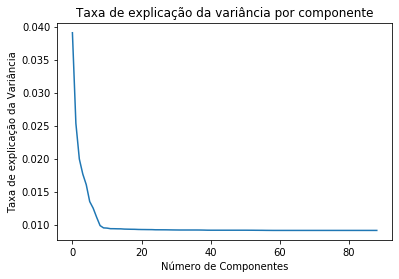

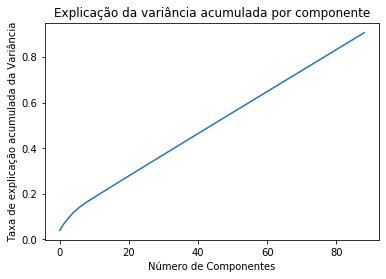

In [23]:
pca = PCA(n_components=0.9, svd_solver="full")
pca.fit(X_data_scaled)

print("Números de componentes do PCA para 90% de explicação da variância: ", pca.n_components_)

plt.plot(pca.explained_variance_ratio_)
plt.title('Taxa de explicação da variância por componente')
plt.ylabel('Taxa de explicação da Variância')
plt.xlabel('Número de Componentes')
plt.show()

plt.plot(add.accumulate(pca.explained_variance_ratio_))
plt.title('Explicação da variância acumulada por componente')
plt.ylabel('Taxa de explicação acumulada da Variância')
plt.xlabel('Número de Componentes')
plt.show()

# Obtido graficamente
pca = PCA(n_components=15)
pca.fit(X_data_scaled)
X_data_pca = pca.transform(X_data_scaled)

### Item 5 - Regressão Linear

Fazemos agora a regressão linear em função dos dados anteriormente tratados. Utilizamos o shuffle splitter do sklearn para repartir os dados em arranjos de 70/30 para treino e teste, respectivamente, e em 5 embaralhamentos diferentes. A validação cruzada também do sklearn é configurada para avaliar a RMSE e a MAE da regressão, cujos valores individuais para cada uma das 5 repetições e também as médias são exibidas abaixo.

Utilizando o PCA com 15 componentes, o erro RMSE médio foi de 2,47 dólares e o MAE foi de 1,60 dólares (supondo que o valor de saída em "y" eram dólares). Isto é um resultado que demonstra a utilidade do PCA, uma vez que a regressão com 89 componentes retornava erros acima de $10^6$.

In [24]:
shuffle_splitter = ShuffleSplit(n_splits=5, test_size=0.3, random_state=1234)
regressor = LinearRegression()
cv_results = cross_validate(regressor, X_data_pca, y_data,
                            cv=shuffle_splitter,
                            scoring={"MSE": make_scorer(mean_squared_error, greater_is_better=False),
                                     "MAE": make_scorer(mean_absolute_error, greater_is_better=False)})

# print(cv_results.keys())
print("\nRMSE para cada repetição: \n", (-cv_results["test_MSE"]) ** (1 / 2))
print("\n\nMAE para cada repetição: \n", -cv_results["test_MAE"])

print("\n\nRMSE médio: ", ((-cv_results["test_MSE"]) ** (1 / 2)).mean())
print("\nMAE médio: ", (-cv_results["test_MAE"]).mean())


RMSE para cada repetição: 
 [2.56438532 2.69903945 2.32235582 1.93230384 2.84091571]


MAE para cada repetição: 
 [1.74302273 1.66889463 1.65069842 1.29538618 1.62432251]


RMSE médio:  2.471800027566019

MAE médio:  1.596464895253393
